# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Recipe Site Traffic Classification 
## Problem Definition
- The product team has requested a classification model with the ability to correctly recommend recipes that produce high traffic on the website, to replace their current selection process for the site. A dataset is given with recipes containing data on the recipe category, nutritional metrics such as calories, carbohydrate, sugar and protein levels, the serving size of the recipe, and the target variable high_traffic (indicating that the recipe generated high traffic on the website). Based on this, Their request is to produce a classification model which can recommend popular recipes for display on the website at least 80% of the time. 

- To begin, the problem can be further defined by noting that the product team is only interested in the model's ability to predict high traffic recipes well, with little to no interest in the model's performance on low traffic recipes. Therefore this can be understood as a request for a classification model with high precision, and true positive predictions should be maximised in this context.

## Section 1: Import Libraries & Data

### 1.1. Importing Necessary Libraries
- Firstly, the required libraries are imported for data analysis, manipulation and visualisation - numpy (np), pandas (pd), matplotlib.pyplot (plt), seaborn, (sns), and missingno (msno). Missingno is an effective library for determining the distribution of missing values across the dataset, making it useful for the data cleaning process.

In [27]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

- Functions for machine learning preprocessing, model instantiation and training, and model evaluation are also imported. 
- As the precision of the model is important to the product team, the precision metric will be the most important metric for the product team's requirements.

In [28]:
#preprocessing
from sklearn.preprocessing import LabelEncoder

#model preparation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

### 1.2. Importing Data
- Following this, the data  is imported from the provided csv file using the read_csv() function in pandas. The head of the data is printed to confirm the data has been loaded to the pd dataframe, df. 
- Immediately, it's evident there are missing values in the nutritional columns (calories, carbohydrate, sugar, protein), which will need to be filled with appropriate values.

In [29]:
#file path
file_path = r'recipe_site_traffic_2212_synthesised.csv'

#read CSV file into a DataFrame
df = pd.read_csv(file_path)

#display dataframe
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


## Section 2: Data Validation

### 2.1. Data Description
- With the data loaded into the workspace, the next step is to describe the dataset and understand its general shape and information. 
- The describe() and info() methods are called on the data to show statistical information and dataframe structure, while the columns and shape attribute are also called to show the column names and number of rows and columns:

In [30]:
#show dataframe information
print(df.describe())
print(df.info())
print(df.columns)
print(df.shape)

           recipe     calories  carbohydrate       sugar     protein
count  947.000000   895.000000    895.000000  895.000000  895.000000
mean   474.000000   435.939196     35.069676    9.046547   24.149296
std    273.519652   453.020997     43.949032   14.679176   36.369739
min      1.000000     0.140000      0.030000    0.010000    0.000000
25%    237.500000   110.430000      8.375000    1.690000    3.195000
50%    474.000000   288.550000     21.480000    4.550000   10.800000
75%    710.500000   597.650000     44.965000    9.800000   30.200000
max    947.000000  3633.160000    530.420000  148.750000  363.360000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein     

### 2.2. Data Description - Observations
- Immediately there are some notable observations from the dataframe information; for example, the calories column has the highest range of values, with a min of 0.14 and a max of 3633.16.
- There are 52 missing values in the nutritional columns. It will be important to investigate the spread of these missing data. Additionally, the high_traffic column appears to have 373 missing values - this will also need to be investigated.
- Lastly, the information on the servings column indicates it's an object rather than a float or an int - this suggests it may have string data in some rows. This will need to be standardised for later model training. 

### 2.3. Printing Unique values
- To further investigate the values in the dataset, a custom function named print_uniques() is defined to print all unique values and their counts from each column of the dataframe.
- The function uses a generator object to iterate through each column, to show unique values and their counts.
- For each column, the function prints the column name, unique values, and the number of unique values. 

In [31]:
#defining custom function to print all unique values and their counts from each column
def print_uniques(df):
    #for large datasets - using generator for speed
    uniques_generator = ((x, df[x].unique(), df[x].nunique()) for x in df.columns)
    
    print('\nUnique Values:')
    for x, unique_values, num_unique in uniques_generator:
        print(f"{x}: \n {unique_values} \n ({num_unique} unique values)")

- With print_uniques() defined, the function is specified to run on the category, servings, and high traffic columns. The output of this can be seen below:

In [32]:
#printing uniques of selected columns
print_uniques(df[['category', 'servings','high_traffic']])


Unique Values:
category: 
 ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert'] 
 (11 unique values)
servings: 
 ['6' '4' '1' '2' '4 as a snack' '6 as a snack'] 
 (6 unique values)
high_traffic: 
 ['High' nan] 
 (1 unique values)


### 2.4. Unique Values - Observations
- It's clear from the output above that the servings column has entries of '4 as a snack' or '6 as a snack', which will need to be cleaned for analysis.
- Additionally, the high_traffic column only has one unique value 'High'; presumably the missing values are all instances where the traffic was low, so these will need to be filled with the 'Low' values.

## Section 3: Data Cleaning

### 3.1. Visualising Missing Data

- With an assessment of the data structure completed, msno can now be used to visualise the missing data.
- The missing values in the high_traffic column appear to be structurally missing data, therefore it's reasonable to fill the missing data in this column using the fillna() function (specifying 'Low' for any missing values.)
- For the missing values in the nutritional column, the dataframe is first sorted by calories and then visualised using the msno matrix() function.

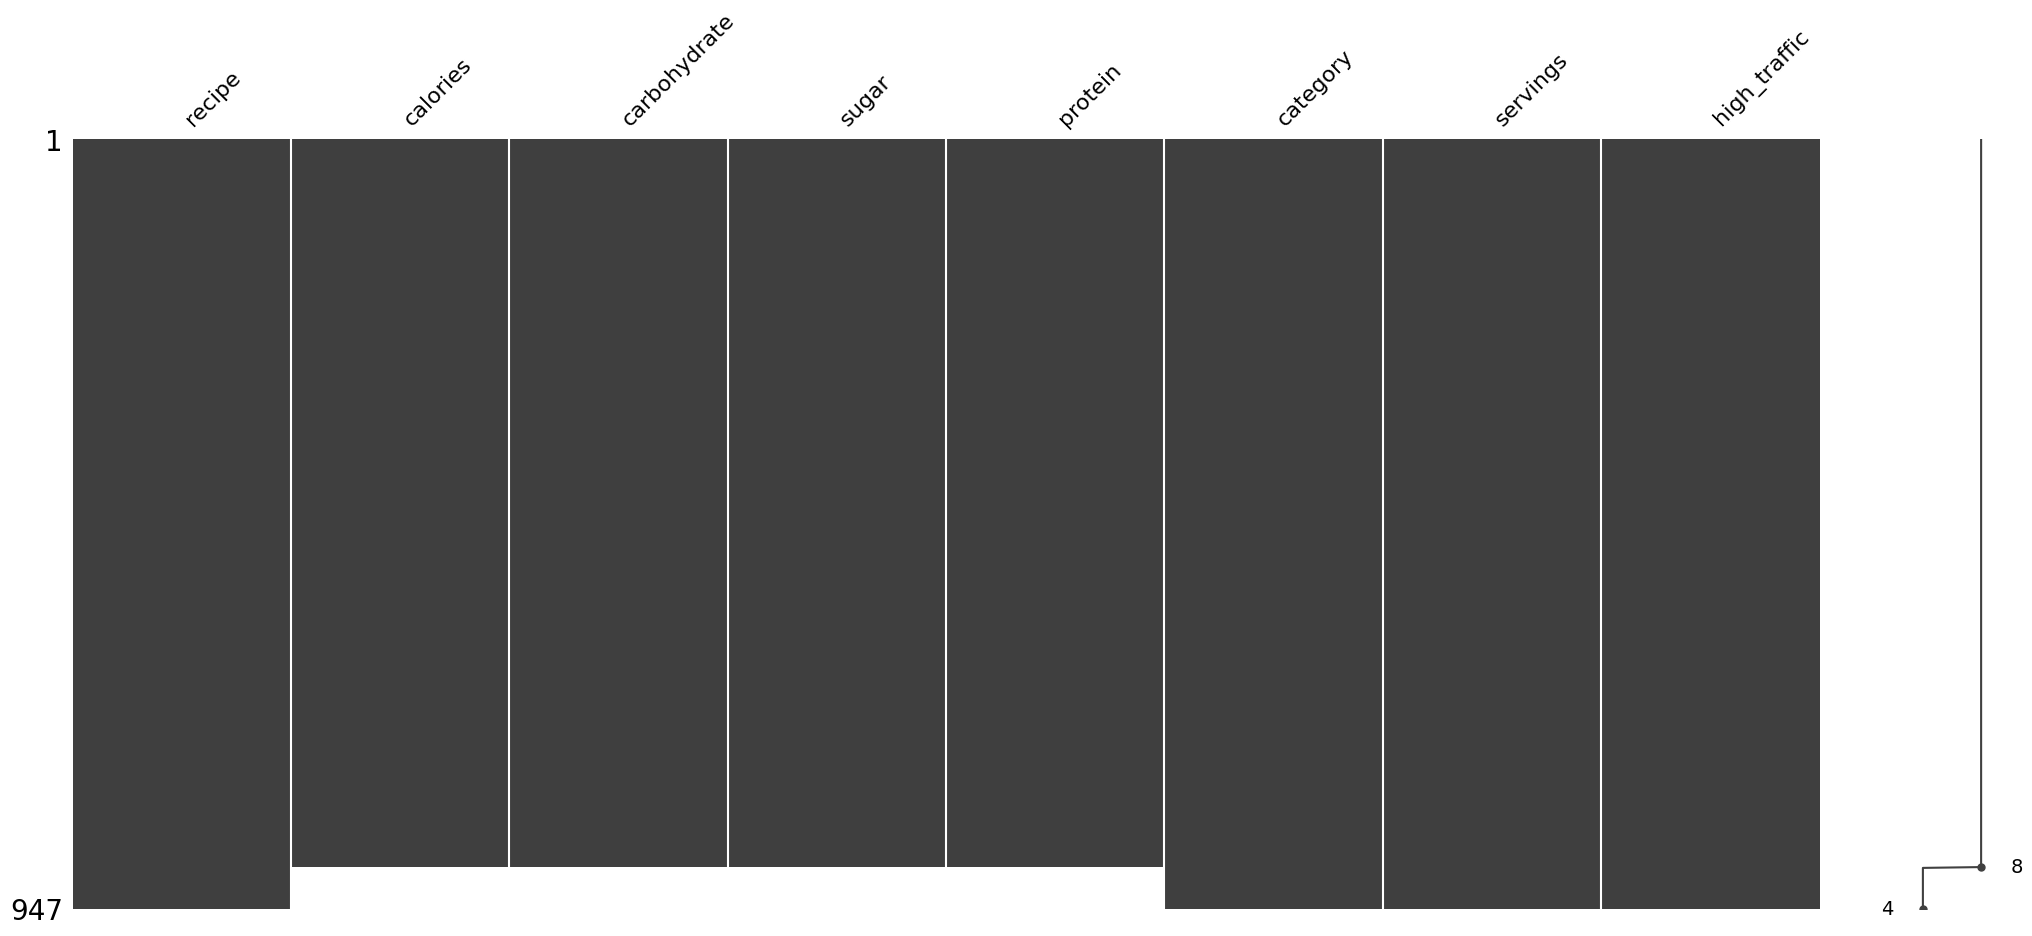

In [33]:
#fill missing values in high_traffic column with 'Low'
df['high_traffic'] = df['high_traffic'].fillna('Low')

#sort df by 'calories' column
df_sorted = df.sort_values('calories')

#create matrix of missing values
msno.matrix(df_sorted)
plt.show()

- Further investigation is conducted by checking whether the missing values are common across only nutritional columns, using the following code:

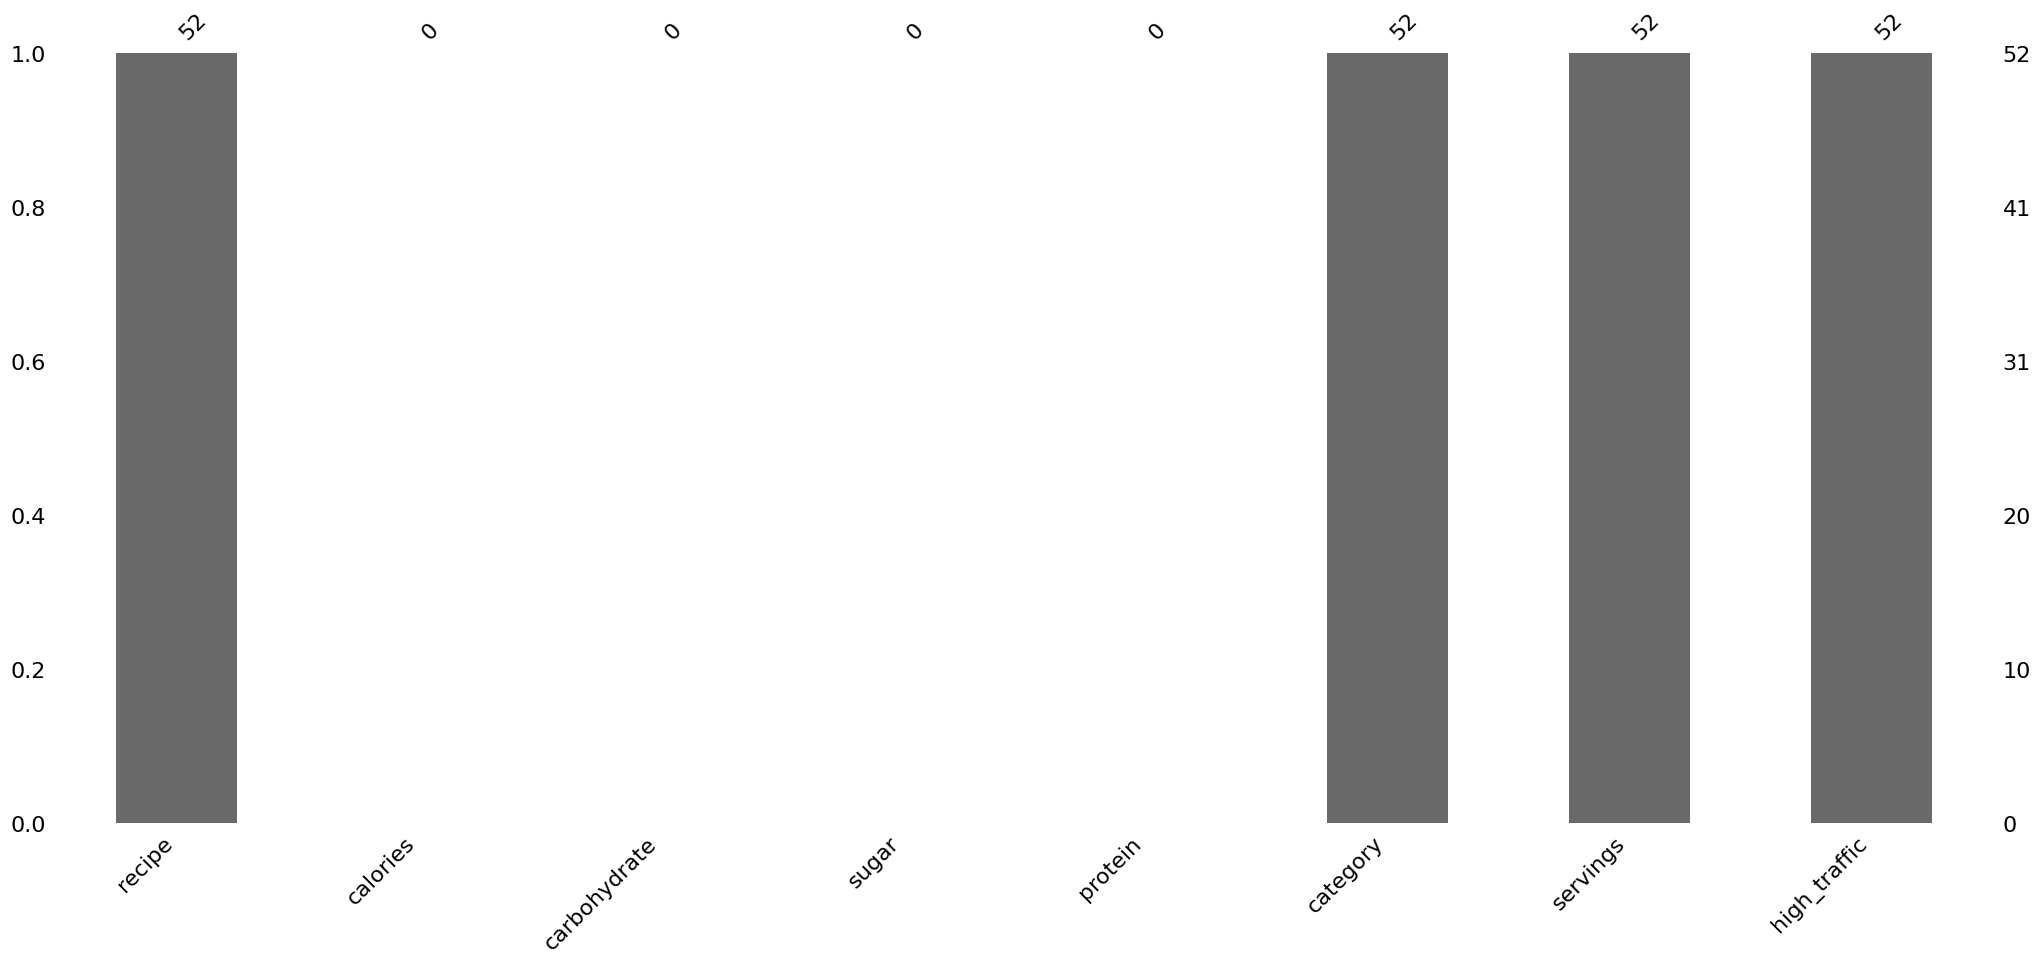

In [34]:
#using msno to visualise only missing values
msno.bar(df[df.isna().any(axis=1)])
plt.show()

### 3.2. Missing Data - Observations

- The missing data appears to be common across all nutritional columns whenever there is missingness; i.e. when the calories data is missing then the carbohydrate, sugars, and protein data is also missing.
- Given the small number of data points in the dataset (947 rows), it wouldn't be a good strategy to drop these values (which represent over 5% of the data points.) A more intelligent strategy will need to be applied for these missing data.
- The initial data cleaning tasks will be addressed first (changing the servings data type, getting the per-serving nutritional values, etc.) then the missing data will be appropriately filled.

### 3.3. Defining a function to clean servings column
- The first function for this purpose is to clean the servings column. This is done by taking the first value of the serving column and converting it to an integer; thereby stripping the 'as a snack' string from some of the values. From there, this is applied to a new column 'serving_count', and the unique values are printed to verify the new data.

In [35]:
def keep_first_character(value):
    return int(str(value)[0])

#apply function to all columns in df
df['serving_count'] = df['servings'].apply(keep_first_character)
print(df['serving_count'].unique()) #print unique values to verify correction

[6 4 1 2]


### 3.4. Defining a function to calculate the per serving nutritional values

- Next, a function is defined to calculate the per-serving values of each of the nutritional columns ('calories', 'protein', 'sugar', and 'carbohydrate'). The function sets up a new column of each nutritional value divided by the serving_count column (created earlier). This is then applied to all nutritional columns, captured in a list to apply to the function.

In [36]:
#define function to calculate per serving values
def calculate_per_serving(df, columns):
    # looping through columns
    for column in columns:
        df[f'{column}_per_serving'] = df[column] / df['serving_count']

#defining nutritional columns
nutritional_columns = ['calories', 'protein', 'sugar', 'carbohydrate']

#calculate per serving values
calculate_per_serving(df, nutritional_columns)

### 3.5. Filling missing values with the mean per category

- With the serving data cleaned and the per-serving nutritional columns created, it's now possible to apply reasonable values to the missing data in the dataset. 
- It's established that only values in the nutritional columns are missing, and other columns (i.e. serving, category) do not have missing data for these rows. Therefore it's possible to apply the median nutritional value per categorical value to the missing data, as can be seen below (the mean values were initially applied to the missing values, however through trial and error it was found that the mean value led to better metrics in the final model.) 
- First this is applied to the per-serving nutritional columns, then scaled up for the total nutritional columns by multiplying the serving size by the per-serving value.

In [37]:
#apply median per_serving value to the missing values
for category in df['category'].unique():
    for column in nutritional_columns:
        fill_value = df.loc[df['category'] == category, f'{column}_per_serving'].median()
        print(f"Median {column} for {category}: {(fill_value).round(2)}") #values rounded for display
        df.loc[(df['category'] == category) & (df[f'{column}_per_serving'].isnull()), f'{column}_per_serving'] = fill_value

#multiply per serving column by serving count to fill missing values
for column in nutritional_columns:
    df[column] = df[f'{column}_per_serving'] * df['serving_count']

#print dataframe
print(df.describe())
print(df.info())


Median calories for Pork: 144.02
Median protein for Pork: 9.15
Median sugar for Pork: 1.64
Median carbohydrate for Pork: 5.82
Median calories for Potato: 95.19
Median protein for Potato: 1.62
Median sugar for Potato: 0.84
Median carbohydrate for Potato: 9.63
Median calories for Breakfast: 64.84
Median protein for Breakfast: 4.24
Median sugar for Breakfast: 1.76
Median carbohydrate for Breakfast: 9.62
Median calories for Beverages: 41.23
Median protein for Beverages: 0.14
Median sugar for Beverages: 2.58
Median carbohydrate for Beverages: 4.04
Median calories for One Dish Meal: 126.57
Median protein for One Dish Meal: 8.7
Median sugar for One Dish Meal: 1.5
Median carbohydrate for One Dish Meal: 11.62
Median calories for Chicken Breast: 108.2
Median protein for Chicken Breast: 10.68
Median sugar for Chicken Breast: 1.0
Median carbohydrate for Chicken Breast: 6.32
Median calories for Lunch/Snacks: 122.37
Median protein for Lunch/Snacks: 4.47
Median sugar for Lunch/Snacks: 0.98
Median car

- With the data now sufficiently cleaned, it's now possible to conduct univariate and multivariate analysis on the data to understand its distributions.

## Section 4: Analysis & Visualisation

### 4.1. Category Analysis

- The first analysis to be conducted is to determine the split of high traffic across different categories - this is done by creating a countplot per category, and plotting the results using matplotlib. The x-axis labels are rotated 45 degrees for better legibility. 

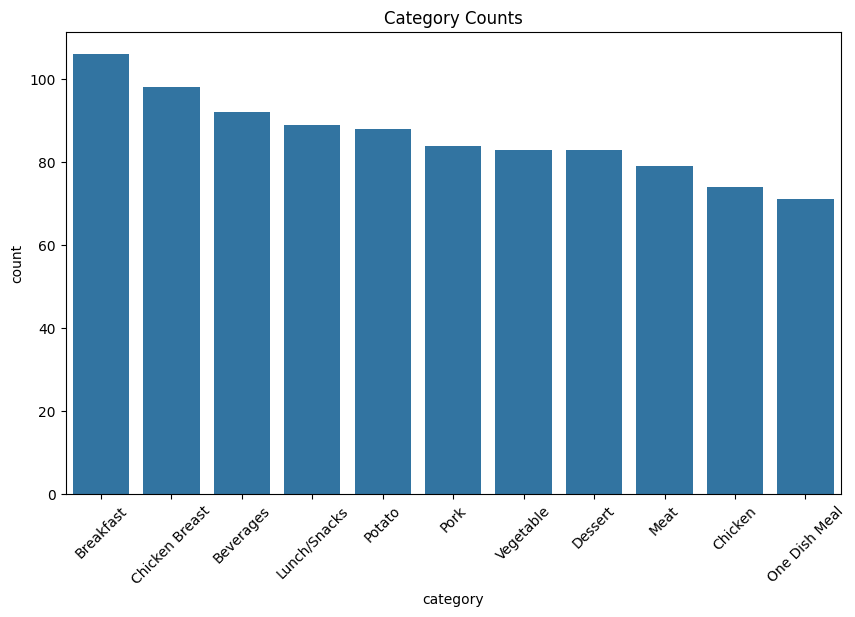

In [38]:
#plotting countplots for category
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.title('Category Counts')
plt.xticks(rotation=45)
plt.show()

- The countplot of categories can be further broken down between high traffic and low traffic recipes, to show the variation in popular recipes between different categories.
- Additionally, a Seaborn heatmap is plotted using crosstab, for an annotated comparison of high and low traffic recipes within each category.

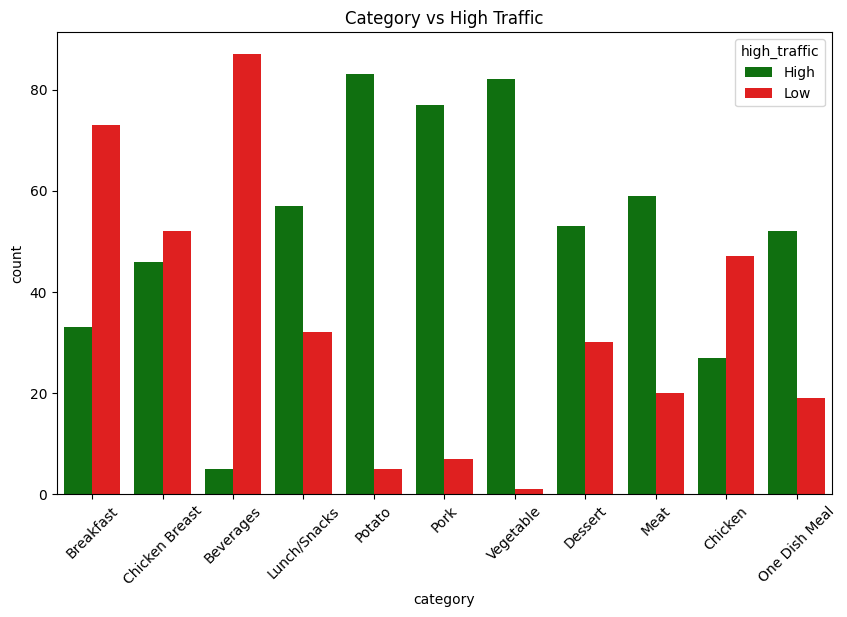

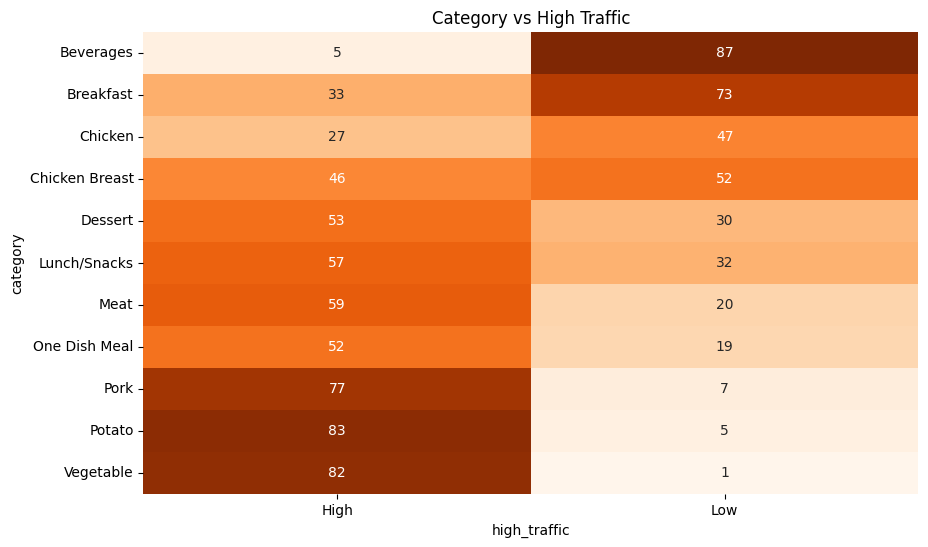

In [39]:
#plotting countplots for category vs high_traffic
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='high_traffic', data=df, palette=['green', 'red'], order=df['category'].value_counts().index)
plt.title('Category vs High Traffic')
plt.xticks(rotation=45)
plt.show()

#plotting crosstab of category and high_traffic
cat_traffic = pd.crosstab(df['category'], df['high_traffic'])
plt.figure(figsize=(10, 6))
sns.heatmap(cat_traffic, annot=True, cmap='Oranges', cbar=False)
plt.title('Category vs High Traffic')
plt.show()

### 4.2. Category Analysis - Observations
- The Breakfast category has the most recipes in the dataset at 106 recipes, while the One Dish Meal category has the lowest at 71.
- The Potato category appears to be the most popular among visitors to the site, with the majority of the recipes in that category seeing high traffic. Similarly it's clear that the Vegetable and Pork categories are also very popular, with these recipes showing high traffic to the site.
- By contrast, the beverages column has the highest number of low traffic recipes, followed by breakfast and chicken. 

### 4.3. Servings Analysis

- A similar analysis is performed on the servings column, to view distributions in serving sizes across the dataset. The code and outputs for this analysis can be seen below. 

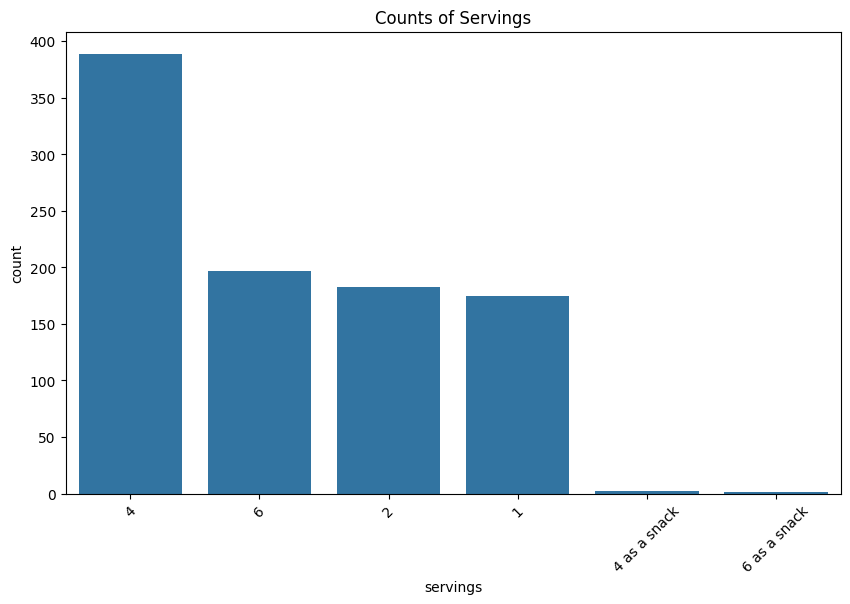

In [40]:
#plotting countplots for serving size
plt.figure(figsize=(10, 6))
sns.countplot(x='servings', data=df, order=df['servings'].value_counts().index)
plt.title('Counts of Servings')
plt.xticks(rotation=45)
plt.show()

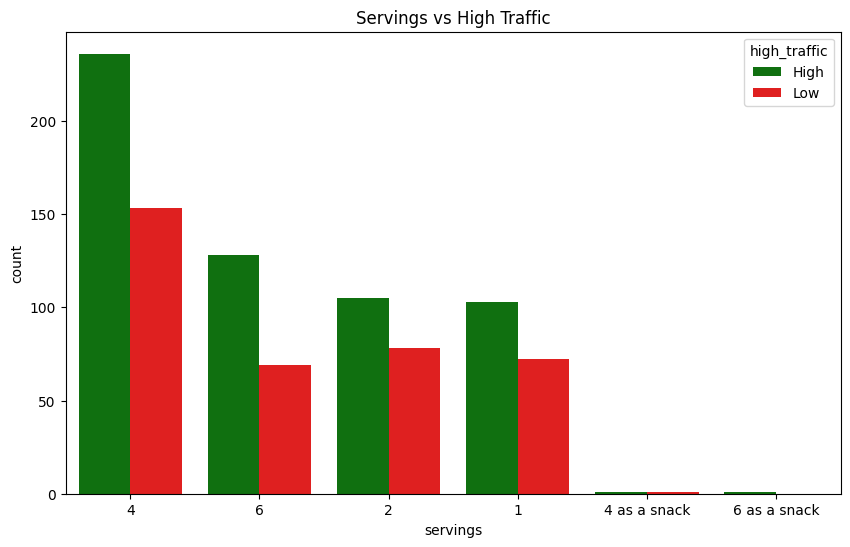

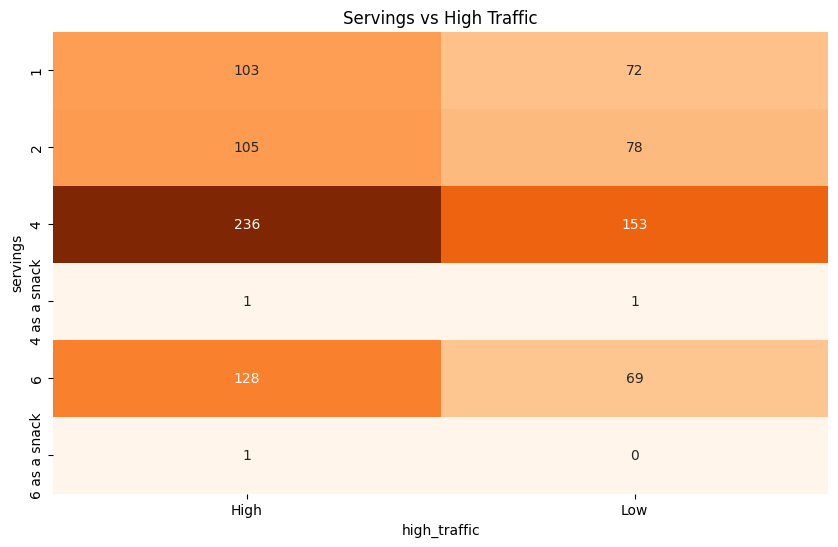

In [41]:
#plotting countplots for servings vs high_traffic
plt.figure(figsize=(10, 6))
sns.countplot(x='servings', hue='high_traffic', data=df, order=df['servings'].value_counts().index, palette=['green', 'red'])
plt.title('Servings vs High Traffic')
plt.show()

#plotting crosstab of category and high_traffic
serve_traffic = pd.crosstab(df['servings'], df['high_traffic'])
plt.figure(figsize=(10, 6))
sns.heatmap(serve_traffic, annot=True, cmap='Oranges',fmt='g', cbar=False)
plt.title('Servings vs High Traffic')
plt.show()

### 4.4. Servings Analysis - Observations
- It's evident from the analysis above that recipes with 4 servings are the most common in the dataset, at 388 recipes. The 1 serving recipes are the least common, at 175 recipes.
- The recipes with '4 as a snack' and '6 as a snack' serving sizes comprise 3 recipes total across the dataset. 

### 4.5. Nutritional Values Analysis

- Following the analysis of category and serving size, an analysis is conducted to compare nutritional values against traffic levels. This is done using boxplots, which can be seen below:
- A loop iterates through each nutritional column ('calories', 'protein', 'sugar', 'carbohydrate').
- Within the loop, Seaborn boxplots are generated to visualize the distribution of each column against site traffic levels.
- The output of this analysis can be seen below.

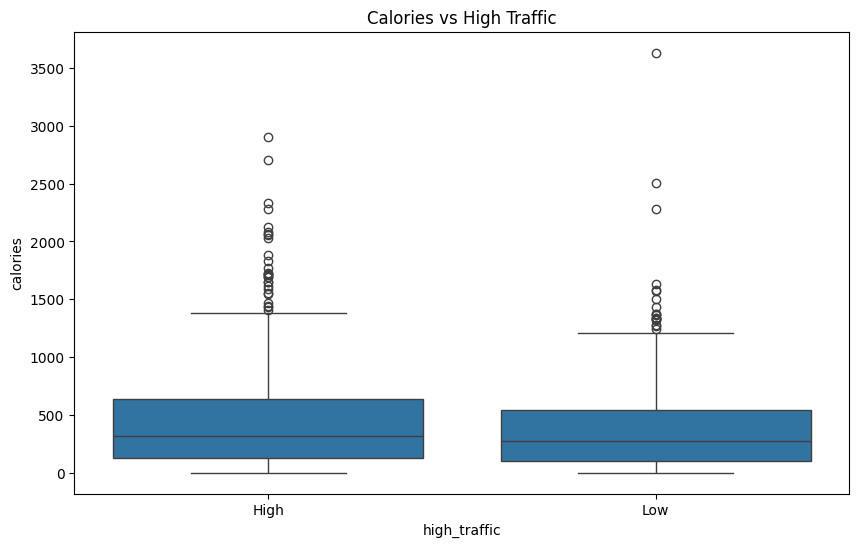

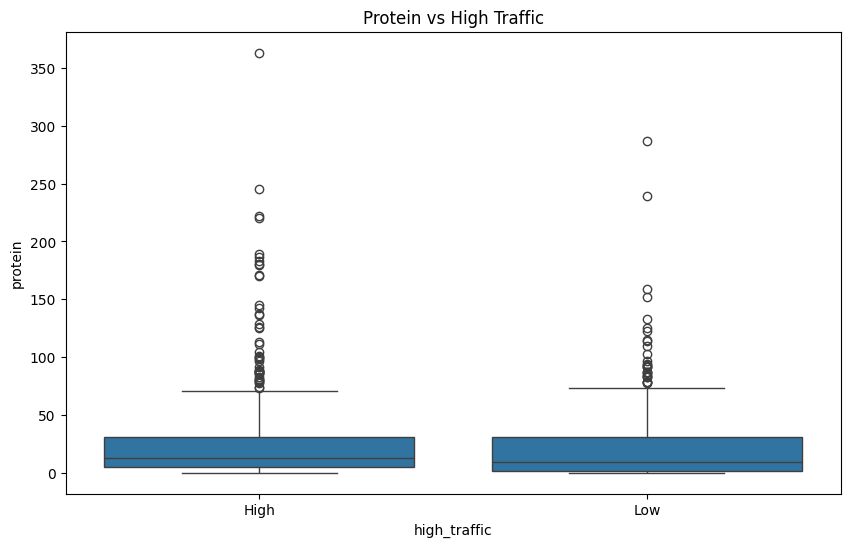

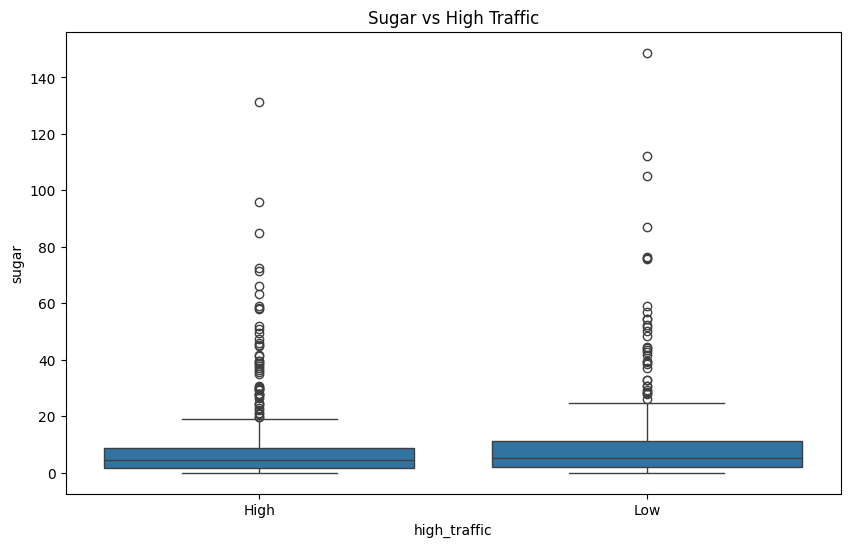

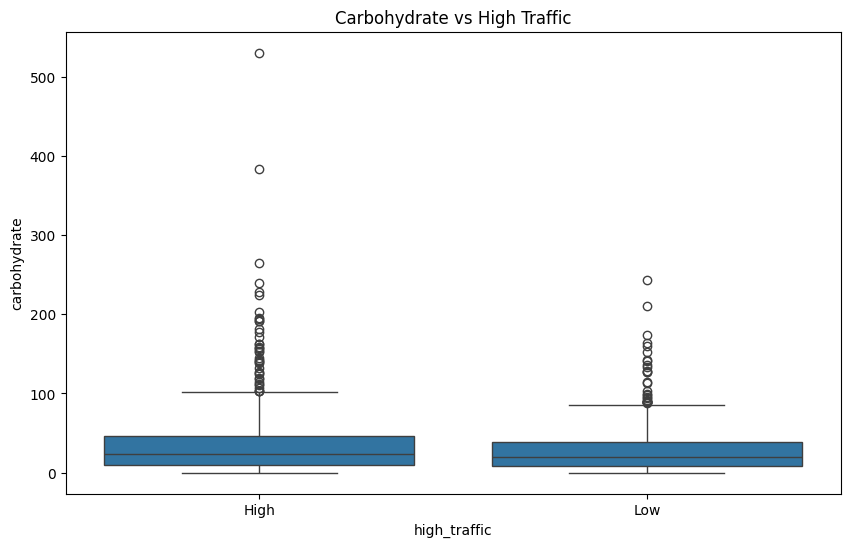

In [42]:
#plotting boxplots for nutritional columns vs high_traffic
for column in nutritional_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='high_traffic', y=column, data=df)
    plt.title(f'{column.capitalize()} vs High Traffic')
    plt.show()

### 4.6. Nutritional Values - Observations

- There doesn't appear to be significant differences in the boxplot comparisons between nutritional values of high traffic recipes and low traffic recipes. 
- This suggects that high traffic and low traffic to the site isn't significantly affected by the nutritional values of the given recipes, as they appear to be roughly the same across the high traffic and low traffic recipes.

## Step 5: Machine Learning Preprocessing

### 5.1. Generating Histograms for Classification Preprocessing

- Prior to the machine learning preprocessing it's beneficial to show histograms of the data, to indicate how the initial data is distributed. This is done using the following hist() function:

array([[<Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'protein'}>],
       [<Axes: title={'center': 'sugar'}>,
        <Axes: title={'center': 'carbohydrate'}>]], dtype=object)

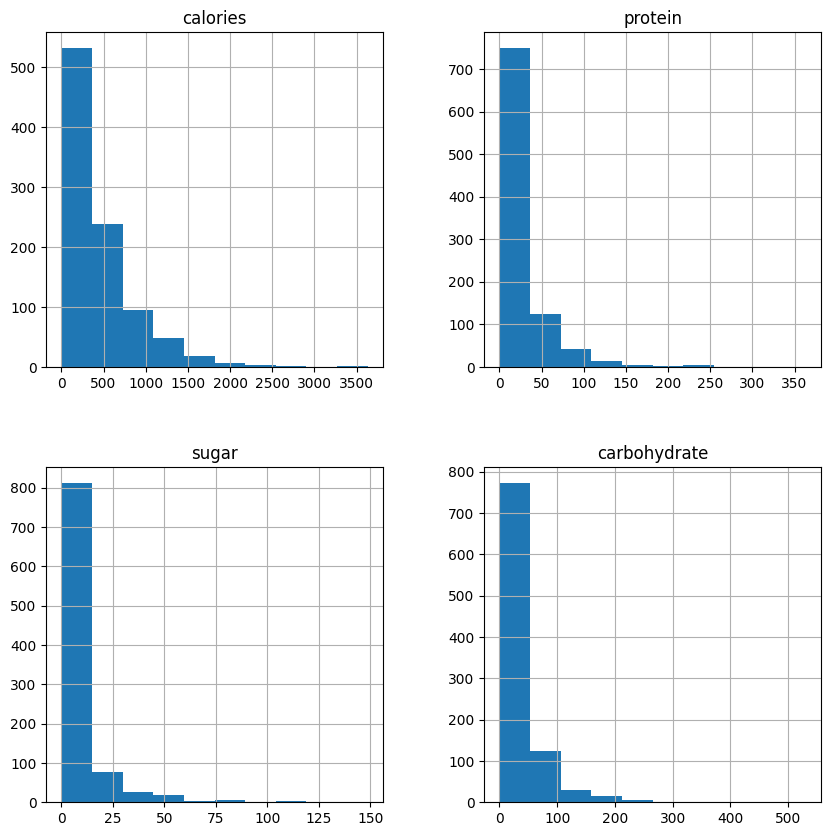

In [43]:
#plotting histograms of df columns
df[nutritional_columns].hist(figsize=(10, 10))

### 5.2. Histograms - Observations

- The histograms of the data show the nutritional values are all heavily right skewed, which extends to the per-serving nutritional values as created earlier.
- For many machine learning models, this skewness will need to be transformed to use this for model training. Therefore this will need to be standardised prior to any model training being conducted.
- With an assessment of the underlying data structure established, a copy of the dataframe can be created to begin with the preprocessing tasks.

### 5.3. Copying df for ML preprocessing

- Beginning with the preprocessing of the classification model, the per serving columns are dropped from the dataset. The per serving columns were initially used as features in the classification models, however trial and error revealed the original columns were better suited to deliver higher metrics from the final classification model.
- A copy of the dataframe is then created for the preprocessing steps.

In [44]:
#dropping unnecessary columns
drop_cols = ['calories_per_serving', 'protein_per_serving', 'sugar_per_serving', 'carbohydrate_per_serving']
df = df.drop(drop_cols,axis=1)

#creating copy of df for ml
df_ml = df.copy()

### 5.4. Scaling Nutritional Columns

- As noted earlier, the numerical nutritional columns are all rightly skewed, and need to be scaled before feeding this data into the classification model.
- The next step involves applying a log transformation to the nutrition columns. Within a loop, each column undergoes the transformation using NumPy's log1p() function, applying a natural logarithm plus one to handle zero values. It's important to note that while this is a common method of scaling skewed data, there are no zero values in the nutritional columns, therefore applying a simple log function would also be fine.  
- Additionally, each transformed column is renamed to reflect the applied transformation using the rename() function. The code and head of the resulting values can be seen below.

In [45]:
#applying log transformation to nutrition columns
nutrition_columns = ['calories','protein','sugar','carbohydrate']
for column in nutrition_columns:
    df_ml[column] = np.log1p(df_ml[column])
    #rename column
    df_ml.rename(columns={column: f'log1p_{column}'}, inplace=True)

#print head of dataframe
print(df_ml.head())

   recipe  log1p_calories  log1p_carbohydrate  log1p_sugar  log1p_protein  \
0       1        6.762851            3.582129     2.384626       4.023564   
1       2        3.596764            3.677819     0.506818       0.652325   
2       3        6.819230            3.776890     1.408545       1.355835   
3       4        4.585274            3.451890     3.679586       0.019803   
4       5        3.333989            1.047319     0.587787       0.425268   

    category servings high_traffic  serving_count  
0       Pork        6         High              6  
1     Potato        4         High              4  
2  Breakfast        1          Low              1  
3  Beverages        4         High              4  
4  Beverages        4          Low              4  


- Once this transformation is complete, histograms are once again called to check the new distribution of the transformed data.

array([[<Axes: title={'center': 'log1p_calories'}>,
        <Axes: title={'center': 'log1p_carbohydrate'}>],
       [<Axes: title={'center': 'log1p_sugar'}>,
        <Axes: title={'center': 'log1p_protein'}>]], dtype=object)

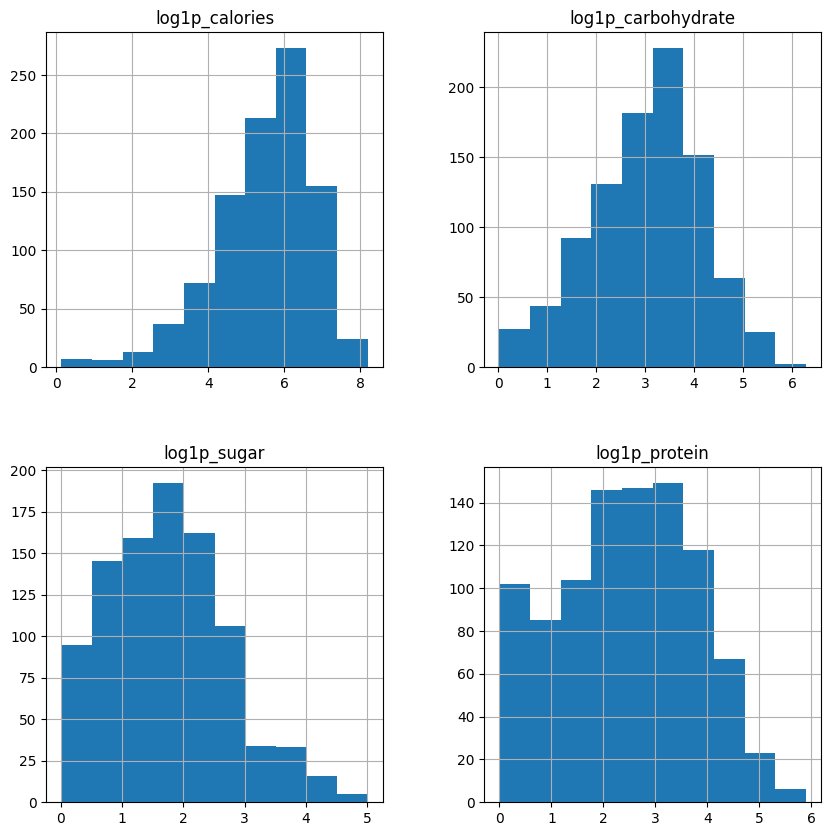

In [47]:
#plotting histograms of df columns
df_ml[['log1p_calories','log1p_carbohydrate','log1p_sugar','log1p_protein']].hist(figsize=(10, 10))

- The calories and carbohydrate columns appear to have benefitted considerably from the transformation, now showing as approximately normally distributed under the log1p transformation. Some benefit can also be seen in the sugar and protein columns, which are now closer to normal distribution.
- With appropriate scaling applied to the numerical features, the categorical features must now be encoded before loading to the chosen classification models.

### 5.5. Label Encoding


- Following the transformations applied to the numerical columns, a list of categorical columns to encode is defined, containing 'category', and 'servings'. These columns contain qualitative information that need to be transformed into numerical representations for certain classification algorithms to process effectively. 
- Important to note that the 'high_traffic' column (i.e. the target column) is separately encoded, as it only has 2 distinct values, and it was considered necessary to make certain that the 'High' values were considered as the positive target variable for precision metrics.
- The servings column is treated as a category below, as trial and error has shown that keeping servings as a value in the dataset has a positive impact on some of the classification model metrics.
- A LabelEncoder object is instantiated; label encoding is a method used to convert categorical data into numerical labels, assigning a unique integer to each distinct category within a column. This transformation allows the classification model to interpret categorical data.
- As the code loops, the LabelEncoder is applied to each categorical column in the list. For each iteration, the LabelEncoder's fit_transform() method is used to encode the categorical values of the respective column, replacing them with their corresponding numerical labels.

In [ ]:
#replace high_traffic column with 1 and 0
df_ml['high_traffic'] = df_ml['high_traffic'].replace({'High': 1, 'Low': 0})

#instantiate LabelEncoder
label_encoder = LabelEncoder()

#list of categorical columns to encode
cat_columns = ['category', 'servings']

#iterate through each column in the list
for column in cat_columns:
    #apply LabelEncoder to encode the column
    df_ml[column] = label_encoder.fit_transform(df_ml[column])


- Finally before moving on to the model training step, some unnecessary columns are dropped from the dataset; namely the recipe and numerical serving count column generated earlier.

In [ ]:
#drop columns
drop_cols = ['recipe','serving_count']
df_ml = df_ml.drop(drop_cols,axis=1)

## Step 6: Final Model Selection

- With the data now sufficiently preprocessed, it's now possible to begin the process of model training and evaluation.
- Two models were selected for training, to compare precision results against each other and the random choice baseline - a LogisticRegression classifier and a RandomForest classifier.
- Logistic Regression is chosen due to its ease in working with small datasets, and its fast runtimes.
- Similarly, Random Forest is a versatile algorithm which is unlikely to overfit, making it a good alternative model choice for this problem. 

### 6.1. Applying LogisticRegression as first classification model

- The first model to be tested on the dataset is a LogisticRegression classifier.
- The model training process begins by creating a copy of the dataframe df_ml for classification purposes, named df_model. The target variable is extracted from df_model, and stored as y. Similarly the target variable is removed from df_model, and the resulting DataFrame is stored in X.
- The data is split into training and testing sets using train_test_split(). The split is stratified based on the 'category' column of df_model, with a test size of 20% and a fixed random state of 42. The train-test sets are stratified in this way to give sets that are proportional to the categories in the original dataset, as this was found to slightly boost model metrics.
- A Logistic Regression model is instantiated and a parameter grid for the Logistic Regression model is defined, encompassing various hyperparameters such as regularization strength, penalty, solver, and maximum iterations, among others. This is done to give the cross validation process a greater chance of finding the best hyperparamaters for the model.
- Randomized Search Cross Validation (RandomizedSearchCV) is instantiated to explore the hyperparameter space efficiently; randomized search is subsequently executed to find the best hyperparameters, maximising precision using 5 fold cross validation.
- Following this, the best precision score and corresponding best hyperparameters found during the search are printed.

In [ ]:
#creating copy of the dataframe for classification
df_model = df_ml.copy()

#extract target variable
y = df_model['high_traffic']

#drop target variable from the dataframe
X = df_model.drop(['high_traffic'], axis=1)

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_model['category'], test_size=0.2, random_state=42)

#instantiate Logistic Regression model
logistic_regression = LogisticRegression()

#define parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'warm_start': [True, False],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'random_state': [None, 42]
}

#printing model eval callout
print("Evaluating Logistic Regression:")

#instantiate randomised search CV
random_search_lr = RandomizedSearchCV(logistic_regression, param_distributions=param_grid, n_iter=20, 
                                      scoring='precision', n_jobs=-1, cv=5, random_state=42)

#fit randomised search CV
random_search_lr.fit(X_train, y_train)

#best model
best_model_lr = random_search_lr.best_estimator_

#best precision score
best_precision_lr = random_search_lr.best_score_

#best hyperparameters
best_params_lr = random_search_lr.best_params_

print("\nBest Precision:", best_precision_lr)
print("Best Parameters:", best_params_lr)

Evaluating Logistic Regression:



Best Precision: 0.8148314540756401
Best Parameters: {'warm_start': True, 'solver': 'saga', 'random_state': 42, 'penalty': 'l2', 'multi_class': 'auto', 'max_iter': 300, 'fit_intercept': True, 'class_weight': 'balanced', 'C': 10}


c:\Users\jlenehan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jlenehan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jlenehan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jl

- It's evident that the Logistic Regression model performs very well on the data, with a best precision of 81.48% using the best parameters listed above; this is above the goal precision metric of 80% as requested by the product team.
- Now this can be compared against the alternate model; Random Forest is subsequently trained on the dataset to view its performance. 

### 6.2. Applying RandomForest as second classification model

- An alternate model is created to compare precision metrics, this time using Random Forest classification.
- As before, the model training process begins by creating a copy of the dataframe df_ml and stored as df_model. The target variable, 'high_traffic', is extracted from df_model and removed from the features in X. The data is then split into training and testing sets, using the same stratification methodology as with the Logistic Regression model.
- A Random Forest classifier is instantiated and a parameter grid for Random Forest is defined, with hyperparameters such as the number of estimators, maximum depth of trees, minimum samples for splitting, and minimum samples for leaf nodes, among others. RandomizedSearchCV is then instantiated to run through the hyperparameters in the parameter grid.
- As with the Logistic Regression model, a randomised search is conducted to find the best hyperparameters to maximise precision using 5 fold cross validation. Subsequently the best precision score and corresponding best hyperparameters found during the search are printed.

In [ ]:
#creating copy of the dataframe for classification
df_model = df_ml.copy()

#extract target variable
y = df_model['high_traffic']

#drop target variable from the dataframe
X = df_model.drop(['high_traffic'], axis=1)

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_model['category'], test_size=0.2, random_state=42)

#instantiate random forest classifier
rf_classifier = RandomForestClassifier()

#define parameter grid for random forest
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

#printing model eval callout
print("Evaluating Random Forest:")

#instantiate randomised search CV
random_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=20, 
                                      scoring='precision', n_jobs=-1, cv=5, random_state=42)

#fit randomised search CV
random_search_rf.fit(X_train, y_train)

#best model
best_model_rf = random_search_rf.best_estimator_

#best precision score
best_precision_rf = random_search_rf.best_score_

#best hyperparameters
best_params_rf = random_search_rf.best_params_

#printing model metrics
print("\nBest Precision:", best_precision_rf)
print("Best Parameters:", best_params_rf)

Evaluating Random Forest:



Best Precision: 0.7882439793448686
Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}


- As can be seen, the Random Forest did not perform as well as the Logistic Regression model, generating a best precision value of 78.82%; this is also marginally less than the goal precision value requested by the product team.

### 6.3. Comparing model precision to random choice as key performance indicator

- Now that both models are trained and optimised with randomised search cross validation, it's possible to compare their performance against the expected results of a "random choice" recommendation.
- The random choice probability of recommending a high traffic model is defined as the proportion of high traffic recipes in the dataset - if a recipe were selected at random for display on the website, this would be the likelihood that it generated high traffic.
- Next, the precision metrics of each model is compared against the random choice probability, to put these results in the appropriate business context.    

In [ ]:
#calculating chance of randomly picking high traffic recipe
random_choice = df[df['high_traffic'] == 'High'].count()['high_traffic'] / len(df['high_traffic'])
print(f"Possibility of choosing high traffic recipe at random: {(100*random_choice).round(2)}%")

#displaying final metrics for logistic regression
print("\nLogistic Regression - Metrics:")
print(f"Final precision: {(100*best_precision_lr).round(3)}%")
print(f"Percentage improvement over random choice: {(100*(best_precision_lr/random_choice)-100).round(3)}%")

#displaying final metrics for random forest
print("\nRandom Forest - Metrics:")
print(f"Final precision: {(100*best_precision_rf).round(3)}%")
print(f"Percentage improvement over random choice: {(100*(best_precision_rf/random_choice)-100).round(3)}%")

Possibility of choosing high traffic recipe at random: 60.61%

Logistic Regression - Metrics:
Final precision: 81.483%
Percentage improvement over random choice: 34.433%

Random Forest - Metrics:
Final precision: 78.824%
Percentage improvement over random choice: 30.047%


- As can be seen above, both models are considerably improved over the random choice probability, with the Logistic Regression  model performing 34.4% better and the Random Forest model performing 30.04% better than random choice.
- Evidently Logistic Regression is the model of choice, having demonstrated a final precision of 81.48% in line with the request of the product team. 

## Step 7: Conclusions and Recommendations

### 7.1. Conclusions

- From an analytical perspective, the Potato category appears to be the most popular among visitors to the site, with the majority of the recipes in that category seeing high traffic. Similarly it's clear that the Vegetable and Pork categories are also very popular, with these recipes showing high traffic to the site. As such these categories should be the priority, if manually choosing recipes for the website. 
- By contrast, the beverages category has the highest number of low traffic recipes, followed by breakfast and chicken. Therefore these categories should be deprioritised, if manually choosing recipes for the website.
- Two classification models were fitted to the data, a RandomForest classifier and a LogisticRegression classifier. The Logistic Regression model performed better compared to the Random Forest model, generating a final precision of 81.48% compared to 78.82%.
- A comparison of the Logistic Regression model against random choice shows the final model is 34.43% better, indicating this is a considerably more optimal approach than current business practices. Similarly the Random Forest model also outperformed random choice, with a 30.04% improvement.
-  Therefore the Logistic Regression model above is the preferred model, as it satisfies the requirements of the product team to recommend high traffic recipes 80% of the time. As such this is the model the data science team will recommend for use by the product team.

### 7.2. Recommendations

- In terms of the classification model, it is recommended that the product team gather more recipes to allow for greater fine tuning of the model. The final iteration of the classification model resulted in an precision score of 81.48%, which is in line with the product team's request from the data science team. With further recipe data, the model may be trained to recommend recipes to an even higher precision than has already been demonstrated. It was noted during data analysis that the breakfast category is the most common in the dataset, however this category is also one of the most unpopular; therefore the product team should strive to increase the number of recipes in the dataset for other categories, to allow for a larger selection of diverse recipes on which to train the model.
- Similarly the product team is also advised to add more data on other features, to supplement the data already given in the dataset. For example, features such as estimated recipe preparation time, number of ingredients, recipe difficulty etc. may help in increasing model precision even further than the current model precision, leading to better recommendations for the website.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation